In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv ')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [3]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#checking the Total No of Rows and Columns
df.shape

(16468, 14)

In [5]:
df.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [6]:
#change datatype of Date column object to Datetime
df['Date']=pd.to_datetime(df['Date'])

In [7]:
#again checking data types
df.dtypes

Unnamed: 0             float64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                   float64
region                  object
dtype: object

In [8]:
#checking for null values
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [9]:
"""Here, we can see in all columns null values are present.Using mode method for categorical data and mean method for 
contineous data we can remove null values."""

'Here, we can see in all columns null values are present.Using mode method for categorical data and mean method for \ncontineous data we can remove null values.'

In [10]:
#using mode method we can remove null values in categorical columns
df['type']=df['type'].fillna(df['type'].mode()[0])
df['region']=df['region'].fillna(df['region'].mode()[0])

#using mean method we can remove null values in numerical columns
df['Date'] = df['Date'].fillna(df['Date'].median())

for i in df.columns:
    if df.dtypes[i]=="float64":
        df[i]=df[i].fillna(df[i].mean())

In [11]:
#again checking null values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [12]:
"""No null values present"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    16468 non-null  float64       
 1   Date          16468 non-null  datetime64[ns]
 2   AveragePrice  16468 non-null  float64       
 3   Total Volume  16468 non-null  float64       
 4   4046          16468 non-null  float64       
 5   4225          16468 non-null  float64       
 6   4770          16468 non-null  float64       
 7   Total Bags    16468 non-null  float64       
 8   Small Bags    16468 non-null  float64       
 9   Large Bags    16468 non-null  float64       
 10  XLarge Bags   16468 non-null  float64       
 11  type          16468 non-null  object        
 12  year          16468 non-null  float64       
 13  region        16468 non-null  object        
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 1.8+ MB


In [13]:
"""In dataset float64,object and datetime64 3 types of data present with memory usage"""

'In dataset float64,object and datetime64 3 types of data present with memory usage'

In [14]:
#checking for duplicated value
df.duplicated().sum()

14950

In [16]:
#drop all duplicate values
df.drop_duplicates(keep=False, inplace=True)

In [17]:
#after dropping duplicates need to reset index 
df=df.reset_index(drop=True)

In [18]:
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
5,5.0,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015.0,Albany
6,6.0,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015.0,Albany
7,7.0,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015.0,Albany
8,8.0,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015.0,Albany
9,9.0,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015.0,Albany


In [19]:
#again checking rows and column
df.shape

(1517, 14)

In [20]:
df.duplicated().sum()

0

In [21]:
"""Now no Null values and No duplicate values in our dataset"""

'Now no Null values and No duplicate values in our dataset'

In [22]:
#checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Unnamed: 0
37.0    40
38.0    40
36.0    39
39.0    38
33.0    38
40.0    38
35.0    38
41.0    37
34.0    37
43.0    36
42.0    36
44.0    35
32.0    34
45.0    34
29.0    33
46.0    33
31.0    33
30.0    32
28.0    31
47.0    30
6.0     28
5.0     28
4.0     28
3.0     28
1.0     28
27.0    28
2.0     28
48.0    27
7.0     27
0.0     27
49.0    26
26.0    26
25.0    26
8.0     26
20.0    25
12.0    24
50.0    24
21.0    24
19.0    24
18.0    24
17.0    24
9.0     24
24.0    24
10.0    24
11.0    24
51.0    23
13.0    23
14.0    23
16.0    23
22.0    23
23.0    23
15.0    21
Name: count, dtype: int64


Date
2015-04-12    34
2015-04-05    34
2015-04-19    33
2015-05-10    32
2015-03-22    32
              ..
2016-07-10     3
2016-07-03     3
2016-06-26     3
2016-06-19     3
2016-09-11     2
Name: count, Length: 104, dtype: int64


AveragePrice
1.08    46
0.99    44
1.03    44
1.10    43
1.09    43
        ..
0.51     1
0.52     1
0.54     1
1.42     1
1.58     1
Name: count, Length: 1

In [23]:
#checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Unnamed: 0
37.0    40
38.0    40
36.0    39
39.0    38
33.0    38
40.0    38
35.0    38
41.0    37
34.0    37
43.0    36
42.0    36
44.0    35
32.0    34
45.0    34
29.0    33
46.0    33
31.0    33
30.0    32
28.0    31
47.0    30
6.0     28
5.0     28
4.0     28
3.0     28
1.0     28
27.0    28
2.0     28
48.0    27
7.0     27
0.0     27
49.0    26
26.0    26
25.0    26
8.0     26
20.0    25
12.0    24
50.0    24
21.0    24
19.0    24
18.0    24
17.0    24
9.0     24
24.0    24
10.0    24
11.0    24
51.0    23
13.0    23
14.0    23
16.0    23
22.0    23
23.0    23
15.0    21
Name: count, dtype: int64


Date
2015-04-12    34
2015-04-05    34
2015-04-19    33
2015-05-10    32
2015-03-22    32
              ..
2016-07-10     3
2016-07-03     3
2016-06-26     3
2016-06-19     3
2016-09-11     2
Name: count, Length: 104, dtype: int64


AveragePrice
1.08    46
0.99    44
1.03    44
1.10    43
1.09    43
        ..
0.51     1
0.52     1
0.54     1
1.42     1
1.58     1
Name: count, Length: 1

In [24]:
#checking no of unique values in each col
df.nunique().to_frame("No of unique values")

,No of unique values
Unnamed: 0,52
Date,104
AveragePrice,113
Total Volume,1517
4046,1517
4225,1517
4770,1516
Total Bags,1517
Small Bags,1517
Large Bags,1377


In [25]:
#separating numerical and categorical columns

#checking for categorical column

cat=list(df.select_dtypes(include='object'))
print("Categorical columns: ",cat)
print("\n")

#checking for numerical columns
num=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num.append(i)
print("numerical columns: ",num)
print("\n")

Categorical columns:  ['type', 'region']


numerical columns:  ['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']




In [26]:
# drop unnecessary columns
df.drop("Unnamed: 0",axis=1,inplace=True)

In [27]:
#again checking dataset headings
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [28]:
#statistical summary of dataset
df.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,2015-08-19 07:10:57.350032896,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
min,2015-01-04 00:00:00,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,2015-04-12 00:00:00,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,2015-07-12 00:00:00,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,2015-11-15 00:00:00,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,2016-12-25 00:00:00,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000
std,NaN,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324


In [29]:
"""In our dataset there is 2 Target...... 1.Average Price    2.Region"""
#checking the list of counts of first target
df["AveragePrice"].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.18, 1.29, 1.25, 1.03, 1.39,
       1.4 , 1.36, 1.3 , 0.88, 1.21, 0.9 , 0.94, 0.75, 0.77, 0.81, 0.8 ,
       0.72, 0.79, 0.67, 0.82, 0.68, 0.76, 0.91, 1.38, 0.92, 0.78, 0.74,
       0.62, 0.83, 0.87, 0.73, 0.7 , 0.89, 0.85, 1.44, 1.42, 1.41, 0.49,
       0.53, 0.66, 0.56, 0.6 , 0.71, 0.65, 0.58, 0.54, 0.52, 0.51, 0.57,
       0.63, 0.64, 0.61, 0.84, 0.86, 0.69, 1.52, 1.53, 1.49, 1.48, 1.56,
       1.62, 1.63, 1.46, 1.51, 1.61, 1.47, 1.66, 1.57, 1.6 , 1.5 , 1.68,
       1.54, 1.64, 1.58])

In [30]:
#checking the list of counts of second target
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [31]:
#checking the unique values of first target col
df["AveragePrice"].value_counts()

AveragePrice
1.08    46
0.99    44
1.03    44
1.10    43
1.09    43
        ..
0.51     1
0.52     1
0.54     1
1.42     1
1.58     1
Name: count, Length: 113, dtype: int64

In [32]:
#checking the unique values of second target col
df["region"].value_counts()

region
California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
DallasFtWorth          17
MiamiFtLauderdale      17
Roano

Text(0.5, 1.0, 'Average Price By Region')

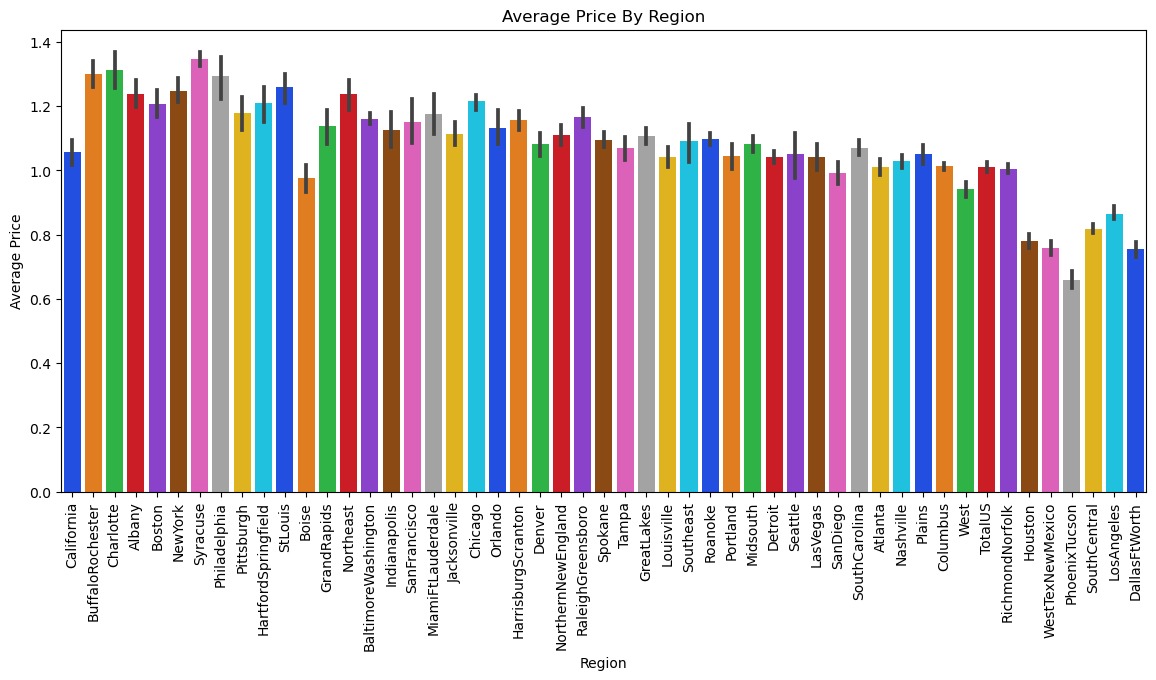

In [33]:
#Average price by region
plt.figure(figsize=(14,6))
df.sort_values(by=['AveragePrice'],ascending=False,inplace=True)
sns.barplot(x ='region',y='AveragePrice',data = df,palette='bright')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price By Region')

In [34]:
"""Here barplot shows the Average prices at different Region. Charlotte, Syracuse,Philadelphia,BuffaloRochester are the regions 
with the highest avocado prices."""

'Here barplot shows the Average prices at different Region. Charlotte, Syracuse,Philadelphia,BuffaloRochester are the regions \nwith the highest avocado prices.'

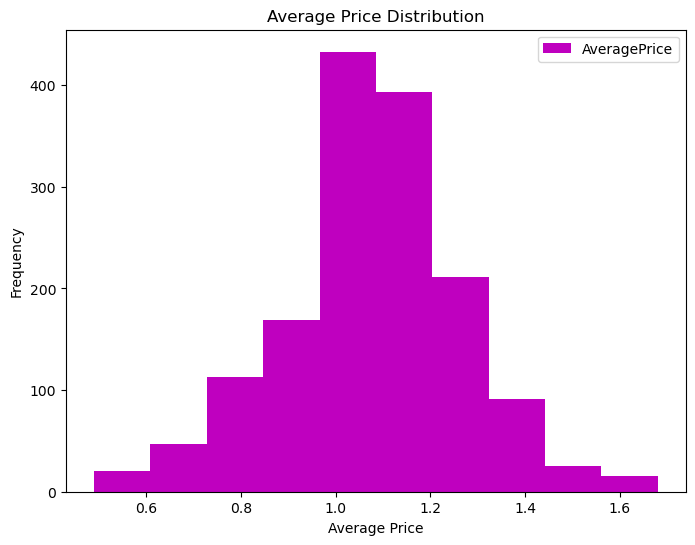

In [35]:
plt.figure(figsize=(8,6))
df["AveragePrice"].plot(kind="hist",color="m")
plt.legend()
plt.xlabel("Average Price")
plt.title("Average Price Distribution")
plt.show()

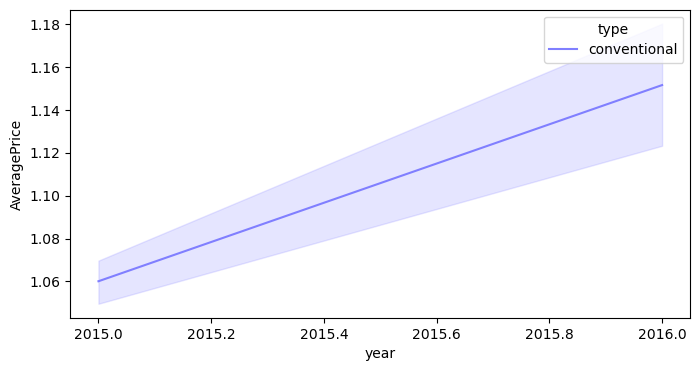

In [36]:
#Average Price by Year
plt.figure(figsize=(8,4))
sns.lineplot(x='year',y='AveragePrice',hue='type',data=df,palette='cool')
plt.show()

In [37]:
"""From above graph in from 2015 Average price is contineously increasing."""

'From above graph in from 2015 Average price is contineously increasing.'

In [38]:
# drop unnecessary columns
df.drop("Date",axis=1,inplace=True)

In [40]:
#after dropping need to reset index 
df=df.reset_index(drop=True)

In [41]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.68,3139833.50,1126017.42,1186843.99,92064.47,734907.62,686375.28,25241.60,23290.74,conventional,2016.0,California
1,1.68,3395058.42,1111431.87,1333386.69,120964.40,829275.46,763934.88,35997.83,29342.75,conventional,2016.0,California
2,1.66,72203.16,960.31,54243.42,22.85,16976.58,15683.05,1256.03,37.50,conventional,2016.0,BuffaloRochester
3,1.64,144089.12,49399.39,26597.39,22714.68,45377.66,38436.79,6940.87,0.00,conventional,2016.0,Charlotte
4,1.63,57178.20,3212.04,43024.32,36.40,10905.44,10474.09,431.35,0.00,conventional,2016.0,Albany


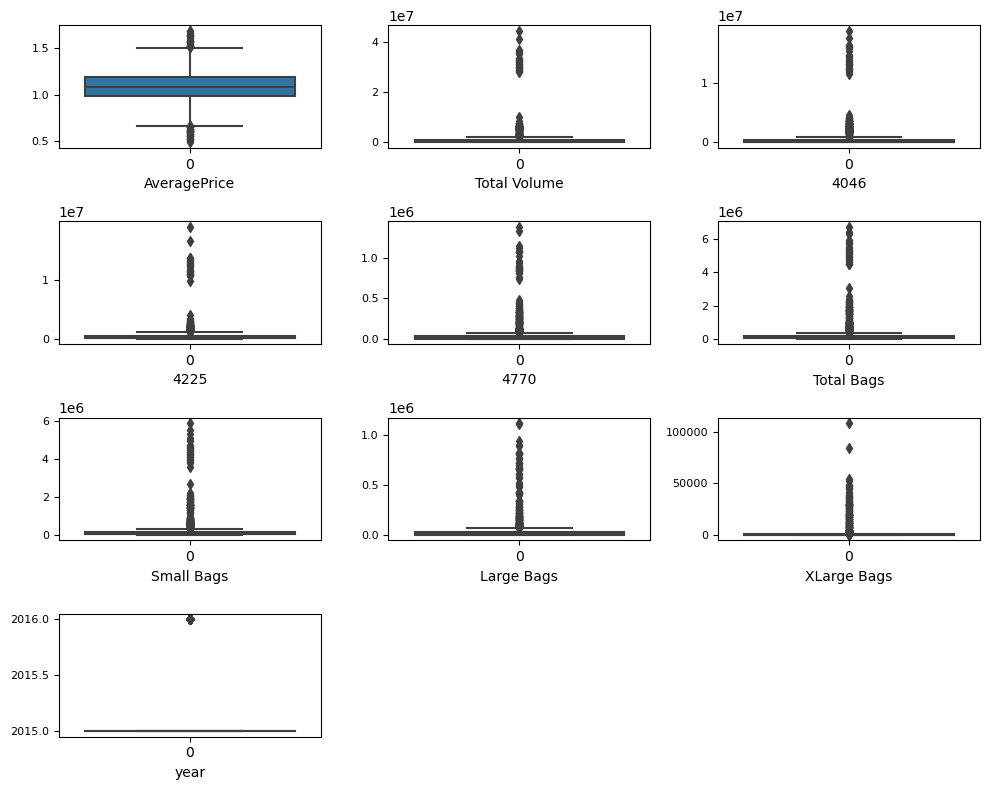

In [50]:
# First we deal for Target Average Price
#checking the outliers using boxplot
plt.figure(figsize=(10,8))
plotnumber=1
for data in num:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[data])
        plt.xlabel(data,fontsize=10)
        plt.yticks(rotation=0,fontsize=8)
    plotnumber+=1
plt.tight_layout()

In [51]:
"""Here we can see in all columns outliers are present.using zscore and IQR Technique we can remove outliers"""
from scipy.stats import zscore
z_score=zscore(df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]

In [52]:
#after removing outliers
df.shape

(1436, 12)

In [53]:
"""After removing the outliers dataset contains 1436 rows and 12 columns """

'After removing the outliers dataset contains 1436 rows and 12 columns '

In [54]:
#encoding categorical cols using LabelEncoder

from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=lab_enc.fit_transform(df[i].values.reshape(-1,1))
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
3,1.64,144089.12,49399.39,26597.39,22714.68,45377.66,38436.79,6940.87,0.0,0,2016.0,7
4,1.63,57178.20,3212.04,43024.32,36.40,10905.44,10474.09,431.35,0.0,0,2016.0,0
5,1.63,78675.66,1426.31,52281.34,27.83,24940.18,24940.18,0.00,0.0,0,2016.0,5
6,1.62,63608.01,3523.63,49837.68,34.00,10212.70,9790.67,422.03,0.0,0,2016.0,0
7,1.62,96853.15,7658.55,79425.81,43.25,9725.54,9586.80,138.74,0.0,0,2016.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1511,0.53,1272428.72,1012900.04,159158.29,5832.62,94537.77,76637.06,17900.71,0.0,0,2015.0,31
1512,0.53,1353850.06,1046887.77,180388.89,4263.45,122309.95,94240.24,28069.71,0.0,0,2015.0,31
1513,0.53,1097224.25,785254.94,204147.30,10346.68,97475.33,72169.92,25305.41,0.0,0,2015.0,31
1514,0.52,1457359.83,1130917.54,199669.94,4499.84,122272.51,90030.35,32242.16,0.0,0,2015.0,31


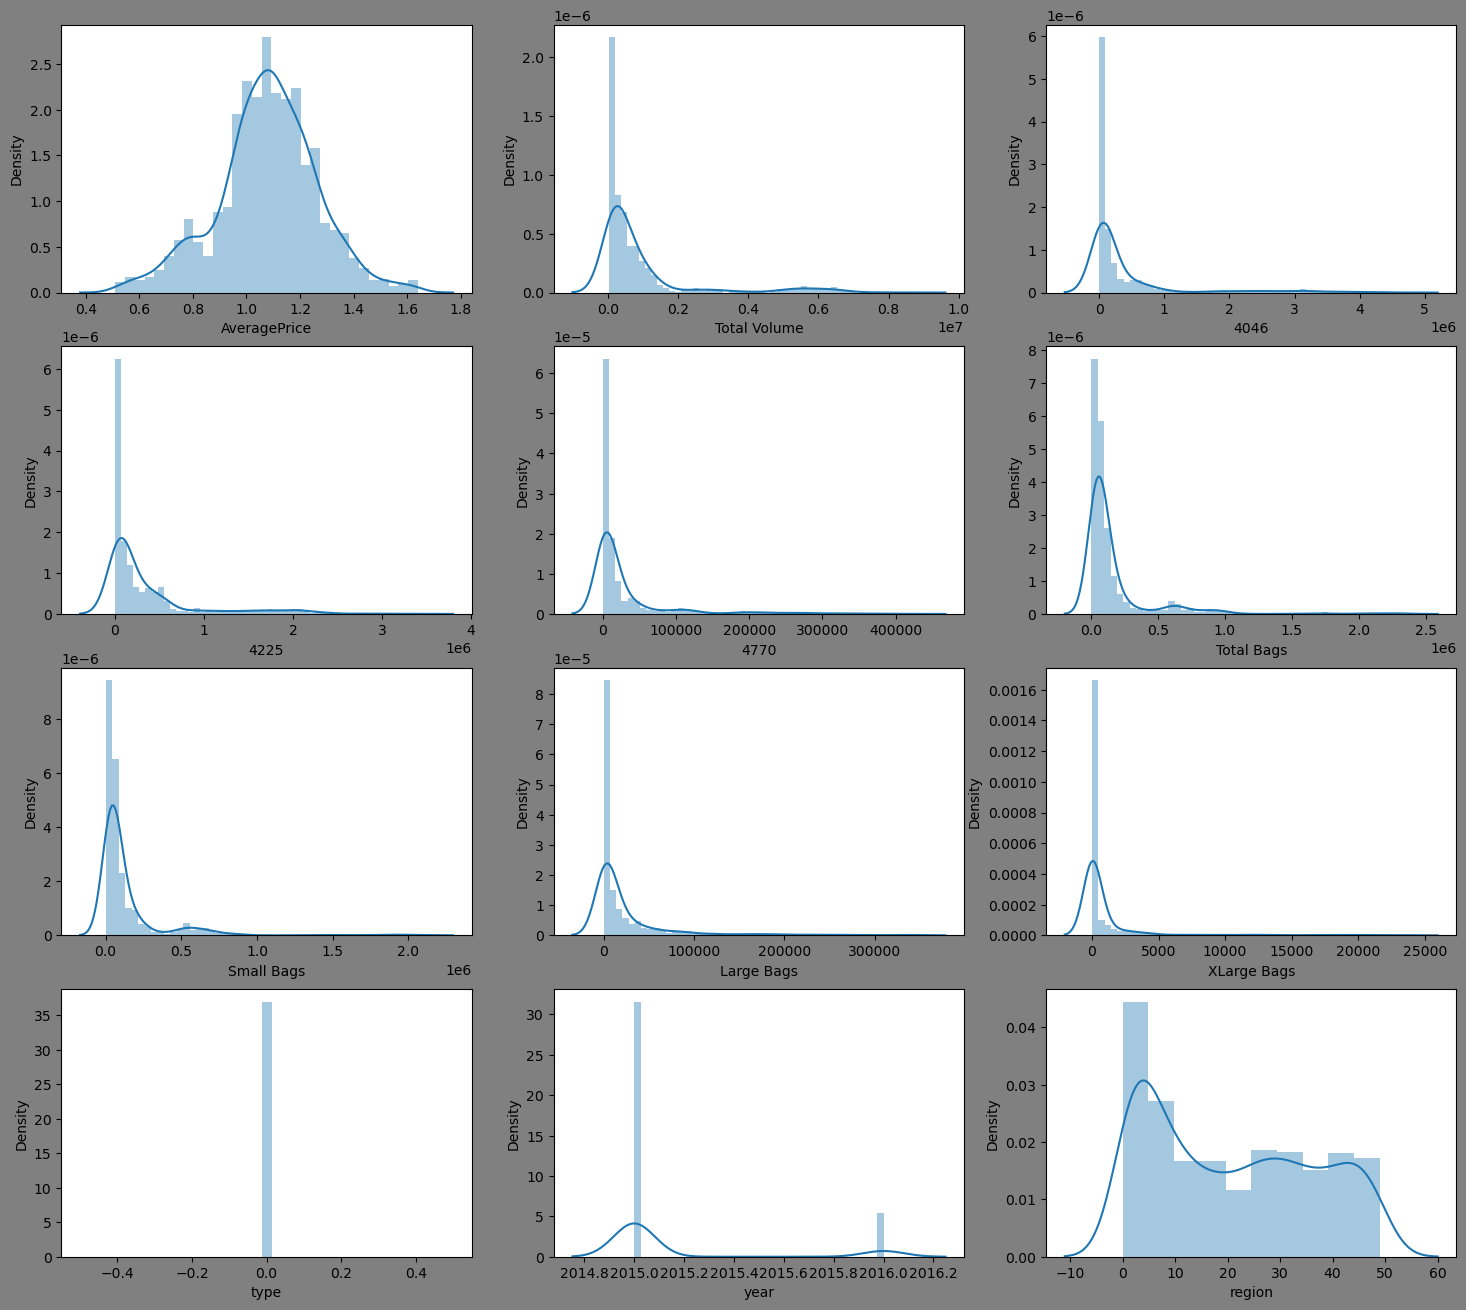

In [55]:
#Cheking For Skewness
#lets see how data is distributed for every column
plt.figure(figsize=(18,16),facecolor='grey')
p=1
for col in df:
    if p<=12:
        ax=plt.subplot(4,3,p)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=10)
    p+=1
plt.show()

In [56]:
"""Here we can see in all columns data have right skewed except Average price,type,region columns"""

'Here we can see in all columns data have right skewed except Average price,type,region columns'

In [57]:
df.skew()

AveragePrice   -0.184770
Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
type            0.000000
year            2.004439
region          0.264436
dtype: float64

In [58]:
#removing skewness using cube root method
df['Total Volume']=np.cbrt(df['Total Volume'])
df['4046']=np.cbrt(df['4046'])
df['4225']=np.cbrt(df['4225'])
df['4770']=np.cbrt(df['4770'])
df['Total Bags']=np.cbrt(df['Total Bags'])
df['Small Bags']=np.cbrt(df['Small Bags'])
df['Large Bags']=np.cbrt(df['Large Bags'])
df['XLarge Bags']=np.cbrt(df['XLarge Bags'])
df['year']=np.cbrt(df['year'])

In [59]:
#again checking skewness
df.skew()

AveragePrice   -0.184770
Total Volume    1.360283
4046            1.241668
4225            0.980401
4770            1.076970
Total Bags      1.569990
Small Bags      1.559423
Large Bags      0.933361
XLarge Bags     1.867443
type            0.000000
year            2.004439
region          0.264436
dtype: float64

In [60]:
#checking the correlation between features and target
cor=df.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.335527,-0.545550,-0.130102,-0.212199,-0.182956,-0.142738,-0.266420,-0.056899,NaN,0.173229,-0.210825
Total Volume,-0.335527,1.000000,0.826861,0.909948,0.666983,0.930646,0.914887,0.705136,0.319301,NaN,-0.065732,0.164921
4046,-0.545550,0.826861,1.000000,0.545333,0.555895,0.679717,0.640617,0.636916,0.235295,NaN,-0.180347,0.302181
4225,-0.130102,0.909948,0.545333,1.000000,0.611707,0.876310,0.882512,0.577867,0.286933,NaN,-0.024204,0.070855
4770,-0.212199,0.666983,0.555895,0.611707,1.000000,0.641999,0.663548,0.362566,0.611666,NaN,-0.004859,-0.027636
Total Bags,-0.182956,0.930646,0.679717,0.876310,0.641999,1.000000,0.986650,0.724100,0.390041,NaN,0.072194,0.110734
Small Bags,-0.142738,0.914887,0.640617,0.882512,0.663548,0.986650,1.000000,0.617078,0.392942,NaN,0.099001,0.089882
Large Bags,-0.266420,0.705136,0.636916,0.577867,0.362566,0.724100,0.617078,1.000000,0.190493,NaN,-0.131450,0.180315
XLarge Bags,-0.056899,0.319301,0.235295,0.286933,0.611666,0.390041,0.392942,0.190493,1.000000,NaN,0.114571,-0.227712
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
"""here we can see the value of columns Type have the NaN values in correlation because 
originally it contains unique value counts.So,we removing it."""
#Dropping type col
df.drop("type",axis=1,inplace=True)

In [62]:
#Again checking the correlation between features and target
cor=df.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
AveragePrice,1.000000,-0.335527,-0.545550,-0.130102,-0.212199,-0.182956,-0.142738,-0.266420,-0.056899,0.173229,-0.210825
Total Volume,-0.335527,1.000000,0.826861,0.909948,0.666983,0.930646,0.914887,0.705136,0.319301,-0.065732,0.164921
4046,-0.545550,0.826861,1.000000,0.545333,0.555895,0.679717,0.640617,0.636916,0.235295,-0.180347,0.302181
4225,-0.130102,0.909948,0.545333,1.000000,0.611707,0.876310,0.882512,0.577867,0.286933,-0.024204,0.070855
4770,-0.212199,0.666983,0.555895,0.611707,1.000000,0.641999,0.663548,0.362566,0.611666,-0.004859,-0.027636
Total Bags,-0.182956,0.930646,0.679717,0.876310,0.641999,1.000000,0.986650,0.724100,0.390041,0.072194,0.110734
Small Bags,-0.142738,0.914887,0.640617,0.882512,0.663548,0.986650,1.000000,0.617078,0.392942,0.099001,0.089882
Large Bags,-0.266420,0.705136,0.636916,0.577867,0.362566,0.724100,0.617078,1.000000,0.190493,-0.131450,0.180315
XLarge Bags,-0.056899,0.319301,0.235295,0.286933,0.611666,0.390041,0.392942,0.190493,1.000000,0.114571,-0.227712
year,0.173229,-0.065732,-0.180347,-0.024204,-0.004859,0.072194,0.099001,-0.131450,0.114571,1.000000,-0.452859


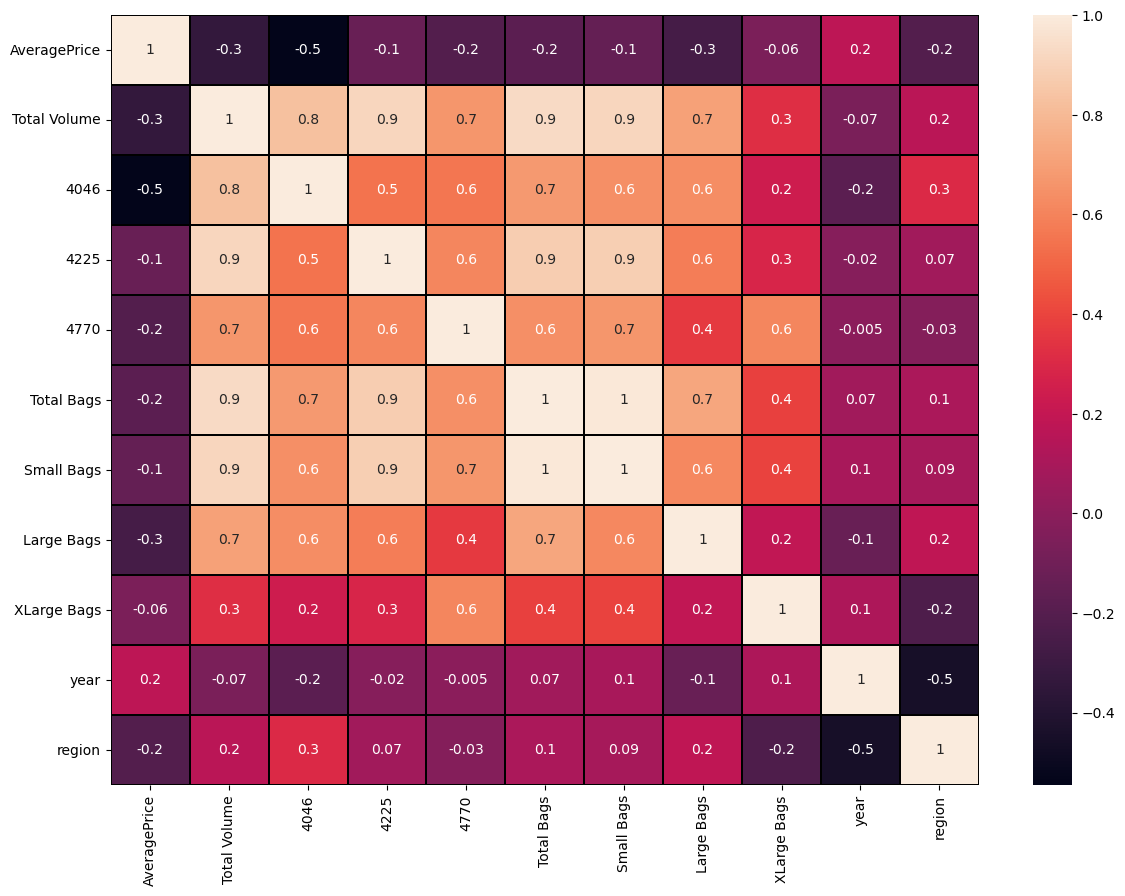

In [65]:
#visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),linewidths=0.2,fmt=".1g",linecolor="black",annot=True)
plt.yticks(rotation=0);
plt.show()

In [66]:
"""From the heatmap not all features are correlated to Average Price. most of them correlated to each other"""

'From the heatmap not all features are correlated to Average Price. most of them correlated to each other'

In [67]:
#We can observe the positive and negative correlated features with the target
cor['AveragePrice'].sort_values(ascending = False)

AveragePrice    1.000000
year            0.173229
XLarge Bags    -0.056899
4225           -0.130102
Small Bags     -0.142738
Total Bags     -0.182956
region         -0.210825
4770           -0.212199
Large Bags     -0.266420
Total Volume   -0.335527
4046           -0.545550
Name: AveragePrice, dtype: float64

In [68]:
#separating features and label
x=df.drop("AveragePrice",axis=1)
y=df["AveragePrice"]

In [69]:
#Feature Scaling using Standard Scalarization
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,-0.729574,-0.385770,-0.890247,0.448914,-0.496147,-0.479273,-0.017337,-0.629534,2.416215,-0.880622
1,-1.102251,-1.016017,-0.716563,-1.186729,-1.172345,-1.100881,-0.774980,-0.629534,2.416215,-1.325962
2,-0.986310,-1.116513,-0.637869,-1.205284,-0.819471,-0.716595,-1.271922,-0.629534,2.416215,-1.007862
3,-1.064902,-1.002731,-0.657675,-1.191602,-1.196395,-1.126367,-0.778586,-0.629534,2.416215,-1.325962
4,-0.903889,-0.873615,-0.450713,-1.173905,-1.213967,-1.134199,-0.931439,-0.629534,2.416215,-1.325962
...,...,...,...,...,...,...,...,...,...,...
1431,0.770097,1.445304,-0.075681,-0.226101,-0.000649,-0.022138,0.448568,-0.629534,-0.413870,0.646256
1432,0.830787,1.477220,0.001611,-0.342889,0.204022,0.136599,0.726903,-0.629534,-0.413870,0.646256
1433,0.630118,1.210580,0.081218,0.021788,0.022758,-0.066232,0.659008,-0.629534,-0.413870,0.646256
1434,0.904526,1.553269,0.066707,-0.323639,0.203768,0.100566,0.821404,-0.629534,-0.413870,0.646256


In [70]:
#Checking Variance Inflation Factor(VIF)
#finding variance inflation factor in each scaled col 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) 
for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,133.667659,Total Volume
1,25.906231,4046
2,37.466226,4225
3,3.034531,4770
4,231.116595,Total Bags
5,170.394703,Small Bags
6,9.543088,Large Bags
7,2.017624,XLarge Bags
8,1.573567,year
9,1.625960,region


In [71]:
"""By checking VIF values we can find the features causing multicollinarity problem.here we can
find the feature Total volume,Total Bags and Small bags have HIGH VIF value which means they have high correlation
with other features.we will drop one of the column """

#Dropping Total Bags column
x.drop("Total Bags",axis=1,inplace=True)

In [72]:
#again checking value to confirm wether the multicollinearity still exists or not

vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) 
for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,129.881163,Total Volume
1,25.584007,4046
2,36.989647,4225
3,2.895518,4770
4,12.355936,Small Bags
5,2.276337,Large Bags
6,1.837806,XLarge Bags
7,1.516540,year
8,1.599925,region


In [74]:
"""Here still VIF values high in some feature so we cannot drop again one column because now we have small dataset."""

'Here still VIF values high in some feature so we cannot drop again one column because now we have small dataset.'

In [75]:
# .....FINDING BEST RANDOM STATE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [76]:
#creating train test split
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Maximum r2 score is ",maxAccu,"on Random state",maxRs)

Maximum r2 score is  0.45506397519427744 on Random state 176


In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge

In [78]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)

print('R2_score:',r2_score(y_test,pred_LR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred_LR)))

R2_score: 0.3733742734200052
R2_score on training data: 38.99726333612704
Mean Absolute Error: 0.12415888865727803
Mean Squared Error: 0.02581588500167949
Root Mean Squared Error: 0.3523618717416486


In [79]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)

print('R2_score:',r2_score(y_test,pred_RFR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred_RFR)))

R2_score: 0.824183812968108
R2_score on training data: 97.47368532513084
Mean Absolute Error: 0.06086768802228409
Mean Squared Error: 0.007243319693593311
Root Mean Squared Error: 0.24671377752830118


In [80]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)

print('R2_score:',r2_score(y_test,pred_lasso))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:',mean_squared_error(y_test,pred_lasso))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred_lasso)))

R2_score: -3.3751823297345496e-05
R2_score on training data: 0.0
Mean Absolute Error: 0.15413016658778253
Mean Squared Error: 0.04119964316781458
Root Mean Squared Error: 0.3925941499663266


In [81]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)

print('R2_score:',r2_score(y_test,pred_rd))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred_rd)))

R2_score: 0.371881012590229
R2_score on training data: 38.977667107129875
Mean Absolute Error: 0.124330746719079
Mean Squared Error: 0.025877404738619453
Root Mean Squared Error: 0.35260565327158183


In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
score=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_LR)-score.mean())*100)

[ -7.82716527 -14.70213683 -28.89601047 -18.8008978   -6.7210825 ]
-15.389458576770815
Difference between R2 score and cross validation score is : 1576.283285019082


In [84]:
score1=cross_val_score(RFR,x,y)
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_RFR)-score1.mean())*100)

[ -5.97135117  -7.78797147 -12.40715547 -15.6172965   -7.05487437]
-9.767729796405217
Difference between R2 score and cross validation score is : 1059.1913609373325


In [85]:
score2=cross_val_score(lasso,x,y)
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_lasso)-score2.mean())*100)

[-10.50913461 -16.03121303  -0.11834921 -13.56118207  -9.90839821]
-10.02565542720521
Difference between R2 score and cross validation score is : 1002.5621675381913


In [86]:
score4=cross_val_score(rd,x,y)
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_rd)-score4.mean())*100)

[ -7.83929103 -14.71645876 -28.81107779 -18.79888301  -6.74401661]
-15.38194543946303
Difference between R2 score and cross validation score is : 1575.3826452053258


In [96]:
"""From the difference between both R2 score and cross validation score computed on R2 score we 
can conclude that RANDOM FOREST Regression as our best fitting and best performing model"""

'From the difference between both R2 score and cross validation score computed on R2 score we \ncan conclude that RANDOM FOREST Regression as our best fitting and best performing model'

In [88]:
from sklearn.model_selection import GridSearchCV
param = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

gscv=GridSearchCV(RFR,param_grid=param,n_jobs=-1, cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [89]:
gscv.best_params_

{'bootstrap': False,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 20}

In [90]:
model=RandomForestRegressor(bootstrap= False,max_features= 'log2',min_samples_split= 2,n_estimators= 20)

In [91]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred)))

R2_score: 0.855447124040807
Mean Absolute Error: 0.05497493036211698
Mean Squared Error: 0.005955325905292477
Root Mean Squared Error: 0.23446733325160027


In [93]:
import joblib
import pickle
filename='avocado_avg_price.pkl'
pickle.dump(model,open(filename,'wb'))

In [94]:
new_model=pickle.load(open('avocado_avg_price.pkl','rb'))
result=new_model.score(x_test,y_test)
print(result*100)

85.5447124040807


In [95]:
conclusion=pd.DataFrame([new_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,349,350,351,352,353,354,355,356,357,358
Predicted,0.968,1.2545,0.7925,0.7115,0.929,1.4095,0.9915,1.0875,0.81,1.1095,...,1.074,0.921,0.9315,1.0255,1.327,0.985,1.1275,0.955,1.0475,0.748
Original,0.930,1.2300,0.7900,0.7200,0.880,1.1800,0.9700,1.1200,0.75,1.1800,...,1.020,0.890,0.9100,1.1900,1.400,0.960,0.9300,0.900,1.0000,0.730


In [98]:
>>In this dataset Date column changed object datatype into datetime.then removing null and duplicate values.
>>After dropping duplicate values need to be reset index. after cleaning data total 1517 rows with 14 columns are remaining.
>>Done the Data Visualization by Average Prices.
>>Removing outliers of numerical columns using Zscore and IQR techniques.
>>Encoding categorical data into numeric using LabelEncoding.
>>Removing skewness of contineous data using Cube root method.
>>visualizing the correlation matrix by plotting heatmap.
>>separating features and label.
>>Feature Scaling using Standard Scalarization.
>>Solving Multicollinearity problem using Variance Inflation Factors.
>>Finding best random state and creating train test split.
>>Target variable have the contineous data therefore using Regression model for prediction of Average price of Avocado.
>>Finding cross validation score on various models.
>>From the difference between both R2 score and cross validation score computed on R2 score we can conclude that RANDOM 
  FOREST Regression is our best fitting and best performing model
>>The best score is 85.54% for prediction of avocado average price.

'>>In this dataset Date column changed object datatype into datetime.then removing null and duplicate values.\n>>After dropping duplicate values need to be reset index. after cleaning data total 1517 rows with 14 columns are remaining.\n>>Done the Data Visualization by Average Prices.\n>>Removing outliers of numerical columns using Zscore and IQR techniques.\n>>Encoding categorical data into numeric using LabelEncoding.\n>>Removing skewness of contineous data using Cube root method.\n>>visualizing the correlation matrix by plotting heatmap.\n>>separating features and label.\n>>Feature Scaling using Standard Scalarization.\n>>Solving Multicollinearity problem using Variance Inflation Factors.\n>>Finding best random state and creating train test split.\n>>Target variable have the contineous data therefore using Regression model for prediction of Average price of Avocado.\n>>Finding cross validation score on various models.\n>>From the difference between both R2 score and cross validation

In [99]:
#Now do process for second target region
#We can observe the positive and negative correlated features with the target
cor['region'].sort_values(ascending = False)

region          1.000000
4046            0.302181
Large Bags      0.180315
Total Volume    0.164921
Total Bags      0.110734
Small Bags      0.089882
4225            0.070855
4770           -0.027636
AveragePrice   -0.210825
XLarge Bags    -0.227712
year           -0.452859
Name: region, dtype: float64

In [100]:
#separating features and label
x=df.drop("region",axis=1)
y=df["region"]

In [101]:
#Feature Scaling using Standard Scalarization
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,2.994171,-0.729574,-0.385770,-0.890247,0.448914,-0.496147,-0.479273,-0.017337,-0.629534,2.416215
1,2.940971,-1.102251,-1.016017,-0.716563,-1.186729,-1.172345,-1.100881,-0.774980,-0.629534,2.416215
2,2.940971,-0.986310,-1.116513,-0.637869,-1.205284,-0.819471,-0.716595,-1.271922,-0.629534,2.416215
3,2.887772,-1.064902,-1.002731,-0.657675,-1.191602,-1.196395,-1.126367,-0.778586,-0.629534,2.416215
4,2.887772,-0.903889,-0.873615,-0.450713,-1.173905,-1.213967,-1.134199,-0.931439,-0.629534,2.416215
...,...,...,...,...,...,...,...,...,...,...
1431,-2.910963,0.770097,1.445304,-0.075681,-0.226101,-0.000649,-0.022138,0.448568,-0.629534,-0.413870
1432,-2.910963,0.830787,1.477220,0.001611,-0.342889,0.204022,0.136599,0.726903,-0.629534,-0.413870
1433,-2.910963,0.630118,1.210580,0.081218,0.021788,0.022758,-0.066232,0.659008,-0.629534,-0.413870
1434,-2.964163,0.904526,1.553269,0.066707,-0.323639,0.203768,0.100566,0.821404,-0.629534,-0.413870


In [102]:
#Checking Variance Inflation Factor(VIF)
#finding variance inflation factor in each scaled col 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) 
for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,1.645775,AveragePrice
1,128.031763,Total Volume
2,23.941521,4046
3,36.834308,4225
4,3.026285,4770
5,230.030281,Total Bags
6,175.020210,Small Bags
7,9.591749,Large Bags
8,1.891960,XLarge Bags
9,1.268817,year


In [103]:
"""By checking VIF values we can find the features causing multicollinarity problem.here we can
find the feature Total volume,Total Bags and Small bags have HIGH VIF value which means they have high correlation
with other features.we will drop one of the column """

#Dropping Total Bags column
x.drop("Total Bags",axis=1,inplace=True)

In [104]:
#again checking value to confirm wether the multicollinearity still exists or not

vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) 
for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,1.627070,AveragePrice
1,125.942633,Total Volume
2,23.760669,4046
3,36.585413,4225
4,2.869200,4770
5,12.137984,Small Bags
6,2.282234,Large Bags
7,1.745687,XLarge Bags
8,1.239569,year


In [105]:
"""Here still VIF values high in some feature so we cannot drop again one column because now we have small dataset."""

'Here still VIF values high in some feature so we cannot drop again one column because now we have small dataset.'

In [106]:
y.value_counts()

region
0     67
3     65
2     65
4     62
1     54
31    51
5     50
44    49
9     47
26    44
19    41
12    40
6     40
38    38
42    37
22    34
47    34
7     31
34    30
28    29
17    29
49    27
48    25
25    25
11    24
41    24
8     23
13    23
32    22
29    21
36    21
15    19
46    19
24    18
10    17
37    17
23    17
45    16
18    16
35    16
39    15
14    14
16    13
30    13
27    12
33    12
20    10
40     9
43     8
21     3
Name: count, dtype: int64

In [107]:
"'Here we can see that the data is not balanced,SO we will balance the data using oversampling method'"

"'Here we can see that the data is not balanced,SO we will balance the data using oversampling method'"

In [131]:
#OVERSAMPLING
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x, y)

In [110]:
#split into train test data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=48)

In [111]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier

def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("\n----------------Train Result------------------\n")
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred=clf.predict(x_test)
        print("\n----------------Test Result------------------\n")
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%")
        print('\n\n The Classification Report\n', classification_report(y_test,pred,digits=2))

In [112]:
random_clf=RandomForestClassifier()
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [113]:
metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 100.00%

----------------Test Result------------------

Accuracy Score: 96.66%


 The Classification Report
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       0.94      1.00      0.97        15
           2       0.95      1.00      0.97        19
           3       1.00      1.00      1.00        21
           4       0.94      0.94      0.94        17
           5       0.93      1.00      0.97        14
           6       1.00      1.00      1.00        12
           7       1.00      0.88      0.93         8
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00        14
          10       0.80      1.00      0.89         4
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         6
          14   

In [114]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [115]:
metric_score(LR,x_train,x_test,y_train,y_test,train=True)
metric_score(LR,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 91.83%

----------------Test Result------------------

Accuracy Score: 86.07%


 The Classification Report
               precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       0.82      0.93      0.87        15
           2       1.00      1.00      1.00        19
           3       1.00      0.90      0.95        21
           4       0.81      1.00      0.89        17
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        12
           7       0.73      1.00      0.84         8
           8       1.00      1.00      1.00         5
           9       0.93      1.00      0.97        14
          10       0.33      0.25      0.29         4
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         6
          14    

In [116]:
from sklearn.ensemble import ExtraTreesClassifier
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)

ExtraTreesClassifier()

In [117]:
metric_score(ETC,x_train,x_test,y_train,y_test,train=True)
metric_score(ETC,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 100.00%

----------------Test Result------------------

Accuracy Score: 97.21%


 The Classification Report
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.94      1.00      0.97        15
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00        14
          10       1.00      0.75      0.86         4
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         6
          14   

In [118]:
#..........CROSS VALIDATION SCORE........
from sklearn.model_selection import cross_val_score

In [119]:
#checking cv score for Random Forest Classifier
score=cross_val_score(random_clf,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=random_clf.predict(x_test)
acc_score1=accuracy_score(y_test,pred)
acc_score1

print("Difference between Accuracy Score and Cross Validation Score:",acc_score1-score.mean())

[0.89930556 0.95818815 0.97560976 0.96864111 0.85017422]
0.9303837591947348
Difference between Accuracy Score and Cross Validation Score: 0.03619005696125399


In [120]:
#checking cv score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=LR.predict(x_test)
acc_score2=accuracy_score(y_test,pred)
acc_score2

print("Difference between Accuracy Score and Cross Validation Score:",acc_score2-score.mean())

[0.82986111 0.8989547  0.89198606 0.88501742 0.75958188]
0.8530802361595045
Difference between Accuracy Score and Cross Validation Score: 0.007643997823782445


In [121]:
#checking cv score for Extra Trees Classifier
score=cross_val_score(ETC,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=ETC.predict(x_test)
acc_score4=accuracy_score(y_test,pred)
acc_score4

print("Difference between Accuracy Score and Cross Validation Score:",acc_score4-score.mean())

[0.94444444 0.96864111 0.98954704 0.98606272 0.93728223]
0.965195509097948
Difference between Accuracy Score and Cross Validation Score: 0.0069493376987093125


In [122]:
"""Extra Trees Classifier is our best model as the difference between accuracy score and cross 
validation score is least

...............Extra Trees Classifier IS OUR BEST MODEL......"""

'Extra Trees Classifier is our best model as the difference between accuracy score and cross \nvalidation score is least\n\n...............Extra Trees Classifier IS OUR BEST MODEL......'

In [123]:
#Hyperparameter Tunning
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini','entropy'],
      'random_state':[10,50,1000],
      'max_depth':[0,10,20],
      'n_jobs':[-2,-1,1] ,
      'n_estimators':[50,100,200,300]
      }
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [125]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 10}

In [126]:
model=ExtraTreesClassifier(criterion= 'entropy',max_depth= 20,n_estimators= 100,n_jobs= -2,random_state= 10)
model.fit(x_train,y_train)
pred=model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

96.65738161559888


In [128]:
#saving model
import joblib
joblib.dump(model,"avocado_region.pkl")

['avocado_region.pkl']

In [129]:
model1=joblib.load("avocado_region.pkl")
prediction=model1.predict(x_test)
prediction

array([22, 26, 47,  9, 42, 44,  9, 14,  4,  0, 34, 31, 11,  0, 32,  8, 32,
       45, 28, 26,  2, 19, 26, 44, 44,  1,  2,  1, 15,  0,  3, 47, 44, 29,
       11, 48,  5, 28, 26, 44,  1, 18, 44, 42, 36, 20, 46, 17, 26,  3,  1,
       27,  4,  5,  0, 32,  4,  3, 11, 25, 32, 11, 30,  1, 25,  1, 16,  6,
       32, 28, 35, 18, 18, 12,  1, 37,  5, 19,  4, 31,  6, 47,  3, 35, 37,
        2, 37, 49,  7, 13, 38, 13,  5, 28, 11,  2,  2,  3, 49, 35, 12, 12,
        4, 44,  3, 26,  9, 46, 19,  5,  7,  2, 31, 42, 31, 44,  4, 45,  0,
        9,  4,  6,  2,  2, 16,  1, 12, 29, 18, 28,  5, 41, 19,  5, 12, 31,
       17, 31,  5, 42, 31,  1, 35, 18, 44, 45, 31, 15, 47,  2, 15, 34, 28,
        0,  1,  2,  3,  3,  1,  4, 22,  6,  3, 10,  7, 31, 31, 16, 28, 26,
        0, 23, 11,  4, 31,  7, 22,  6, 31, 31,  9, 48, 21, 37, 48, 23,  9,
        2, 22, 11,  9,  3,  3, 22,  3, 31, 31, 25, 28,  6, 12,  2, 37,  3,
       32, 42,  8, 22, 43,  9, 11, 27,  2,  1, 46, 23, 39, 17, 12,  3,  7,
       38, 30,  3, 17,  2

In [130]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,22,22
1,26,26
2,47,47
3,9,9
4,42,42
...,...,...
354,49,49
355,25,25
356,26,26
357,25,25
